In [130]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [131]:
# Step 2: Load the dataset
churn_df = pd.read_csv( r"C:\Users\bhavya\OneDrive\Desktop\customer_churn.csv")

In [132]:
# Step 3: Exploratory Data Analysis (EDA)
print(churn_df.head())
print(churn_df.describe())
print(churn_df.info())

   customerID  gender  SeniorCitizen  tenure  MonthlyCharges Churn
0  7590-VHVEG  Female              0       1           29.85    No
1  5575-GNVDE    Male              0      34           56.95   Yes
2  3668-QPYBK    Male              0       2           53.85    No
3  7795-CFOCW    Male              0      45           42.30    No
4  9237-HQITU  Female              0       2           70.70   Yes
       SeniorCitizen     tenure  MonthlyCharges
count      91.000000  91.000000       91.000000
mean        0.472527  22.329670       68.100549
std         0.502011  14.032545       21.204194
min         0.000000   1.000000       24.250000
25%         0.000000  10.000000       52.000000
50%         0.000000  21.000000       67.300000
75%         1.000000  33.500000       86.750000
max         1.000000  50.000000      102.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------        

In [133]:
# Check for missing values
print(churn_df.isnull().sum())

customerID        0
gender            0
SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64


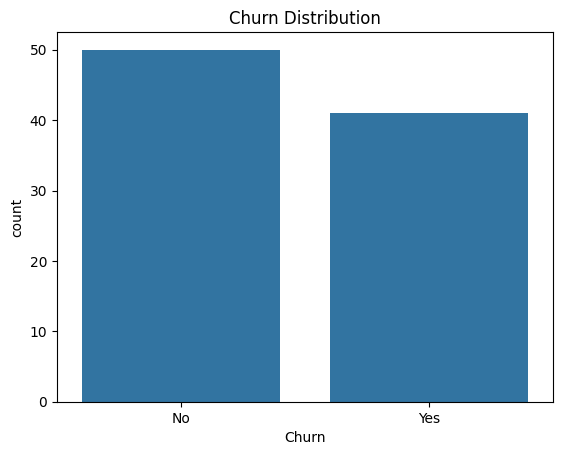

In [134]:
# Visualize the distribution of the target variable
sns.countplot(data=churn_df, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [135]:
# Step 4: Data Preprocessing
# Convert categorical variables into dummy/indicator variables
churn_df = pd.get_dummies(churn_df, drop_first=True)

In [136]:

# Split data into features and target label
X = churn_df.drop('Churn_Yes', axis=1)
y = churn_df['Churn_Yes']

In [137]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# Step 5: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [140]:
# Step 6: Hyperparameter Tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [141]:

logreg_grid_search = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [142]:
# Best parameters and Logistic Regression model
logreg_best = logreg_grid_search.best_estimator_
print(f"Best Logistic Regression Parameters: {logreg_grid_search.best_params_}")
print(f"Best Logistic Regression Score: {logreg_grid_search.best_score_:.2f}")


Best Logistic Regression Parameters: {'C': 10, 'solver': 'lbfgs'}
Best Logistic Regression Score: 0.78


In [143]:
# Evaluate Logistic Regression model
y_pred_logreg = logreg_best.predict(X_test)
print("Logistic Regression Evaluation after tuning")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy after tuning: {logreg_acc * 100:.2f}%")

Logistic Regression Evaluation after tuning
[[13  0]
 [14  1]]
              precision    recall  f1-score   support

       False       0.48      1.00      0.65        13
        True       1.00      0.07      0.12        15

    accuracy                           0.50        28
   macro avg       0.74      0.53      0.39        28
weighted avg       0.76      0.50      0.37        28

Logistic Regression Accuracy after tuning: 50.00%


In [163]:
# Step 7: Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [164]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [165]:
# Best parameters and Random Forest model
rf_best = rf_grid_search.best_estimator_
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest Score: {rf_grid_search.best_score_:.2f}")

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Score: 0.77


In [166]:
# Evaluate Random Forest model
y_pred_rf = rf_best.predict(X_test)
print("Random Forest Evaluation after tuning")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy after tuning: {rf_acc * 100:.2f}%")

Random Forest Evaluation after tuning
[[8 5]
 [8 7]]
              precision    recall  f1-score   support

       False       0.50      0.62      0.55        13
        True       0.58      0.47      0.52        15

    accuracy                           0.54        28
   macro avg       0.54      0.54      0.54        28
weighted avg       0.54      0.54      0.53        28

Random Forest Accuracy after tuning: 53.57%


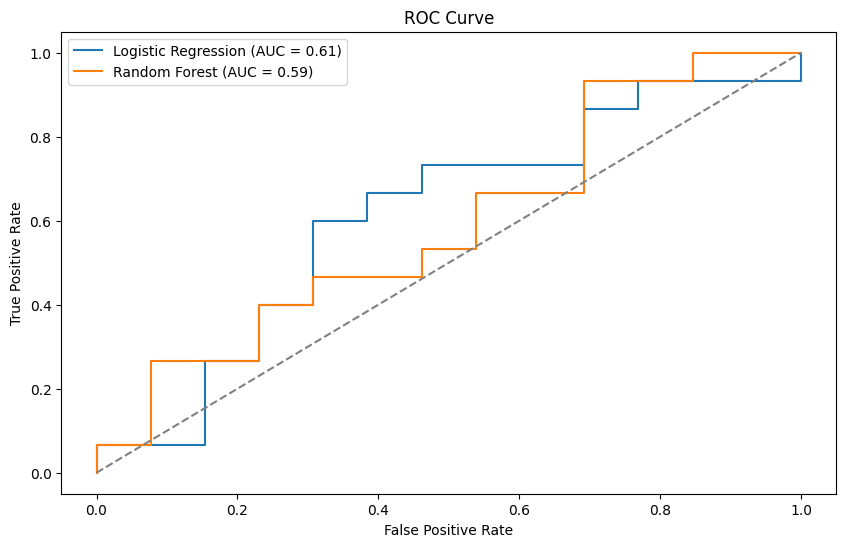

In [167]:
# Step 8: ROC Curve and AUC for comparison
logreg_prob = logreg_best.predict_proba(X_test)[:, 1]
rf_prob = rf_best.predict_proba(X_test)[:, 1]

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

plt.figure(figsize=(10, 6))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, logreg_prob))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, rf_prob))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()